## <span style="color:#db7d60">Setup</span>

In [1]:
%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *
import data_manager
import analysis as anal

import vector
from particle import Particle
from particle import PDGID

plt.rcParams['figure.figsize'] = (21, 6)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

/global/homes/e/eshy/.local/lib/python3.11/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


## <span style="color:#db7d60">Analysis</span>

(<Figure size 6300x1800 with 1 Axes>, <Axes: >)

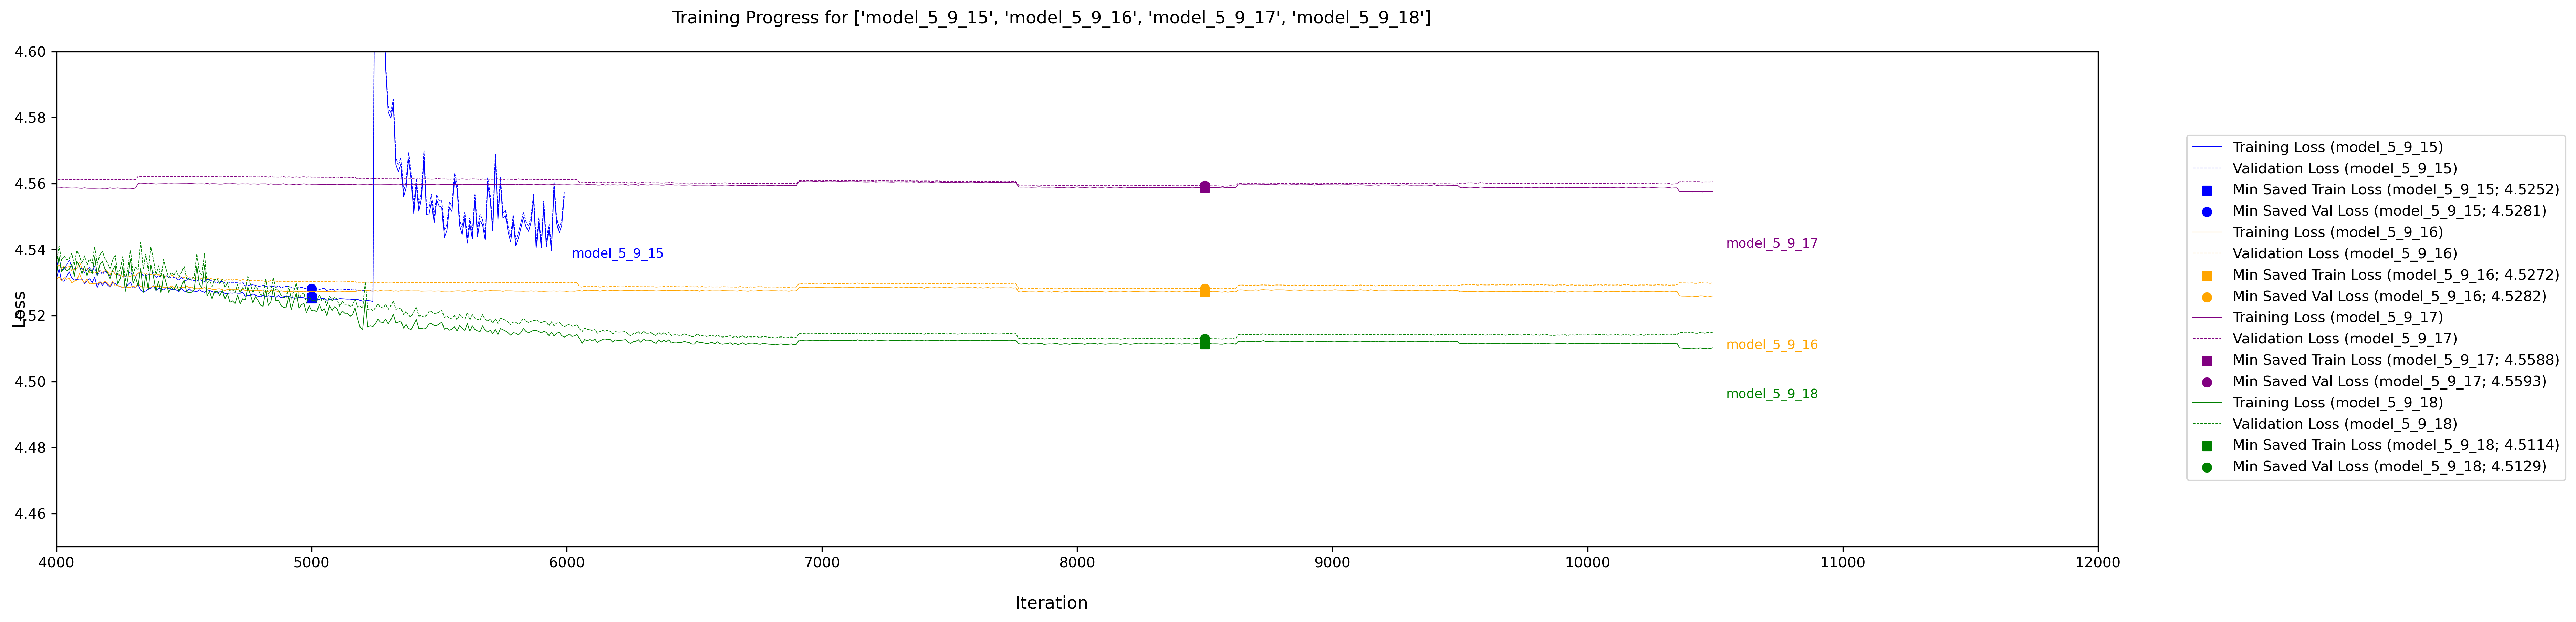

In [15]:
# anal.plotting.plot_training_run(['model_5_9_1', 'model_5_9_2', 'model_5_9_3'])
# anal.plotting.plot_training_run(['model_5_9_1', 'model_5_9_2', 'model_5_9_3', 'model_5_9_4', 'model_5_9_5', 'model_6_1_1'], use_log=True)
# anal.plotting.plot_training_run(['model_5_9_5', 'model_5_9_6', 'model_5_9_7', 'model_6_1_1'], use_log=True, y_lim=(4.3, 5.2), x_lim=(5000, 14000))
# anal.plotting.plot_training_run(['model_5_9_5', 'model_5_9_6', 'model_5_9_7', 'model_6_1_1'], use_log=False, x_lim=(0, 5000))
anal.plotting.plot_training_run(['model_5_9_15', 'model_5_9_16', 'model_5_9_17', 'model_5_9_18'], use_log=False, y_lim=(4.45, 4.6), x_lim=(4000, 12000))
anal.plotting.plot_training_run(['model_5_9_9', 'model_5_9_10', 'model_5_9_11', 'model_5_9_12', 'model_5_9_13', 'model_5_9_14', 'model_5_9_15', 'model_5_9_16', 'model_5_9_17', 'model_5_9_18'], use_log=False, y_lim=(4.45, 4.8), x_lim=(4000, 12000))

(<Figure size 6300x1800 with 2 Axes>, <Axes: >)

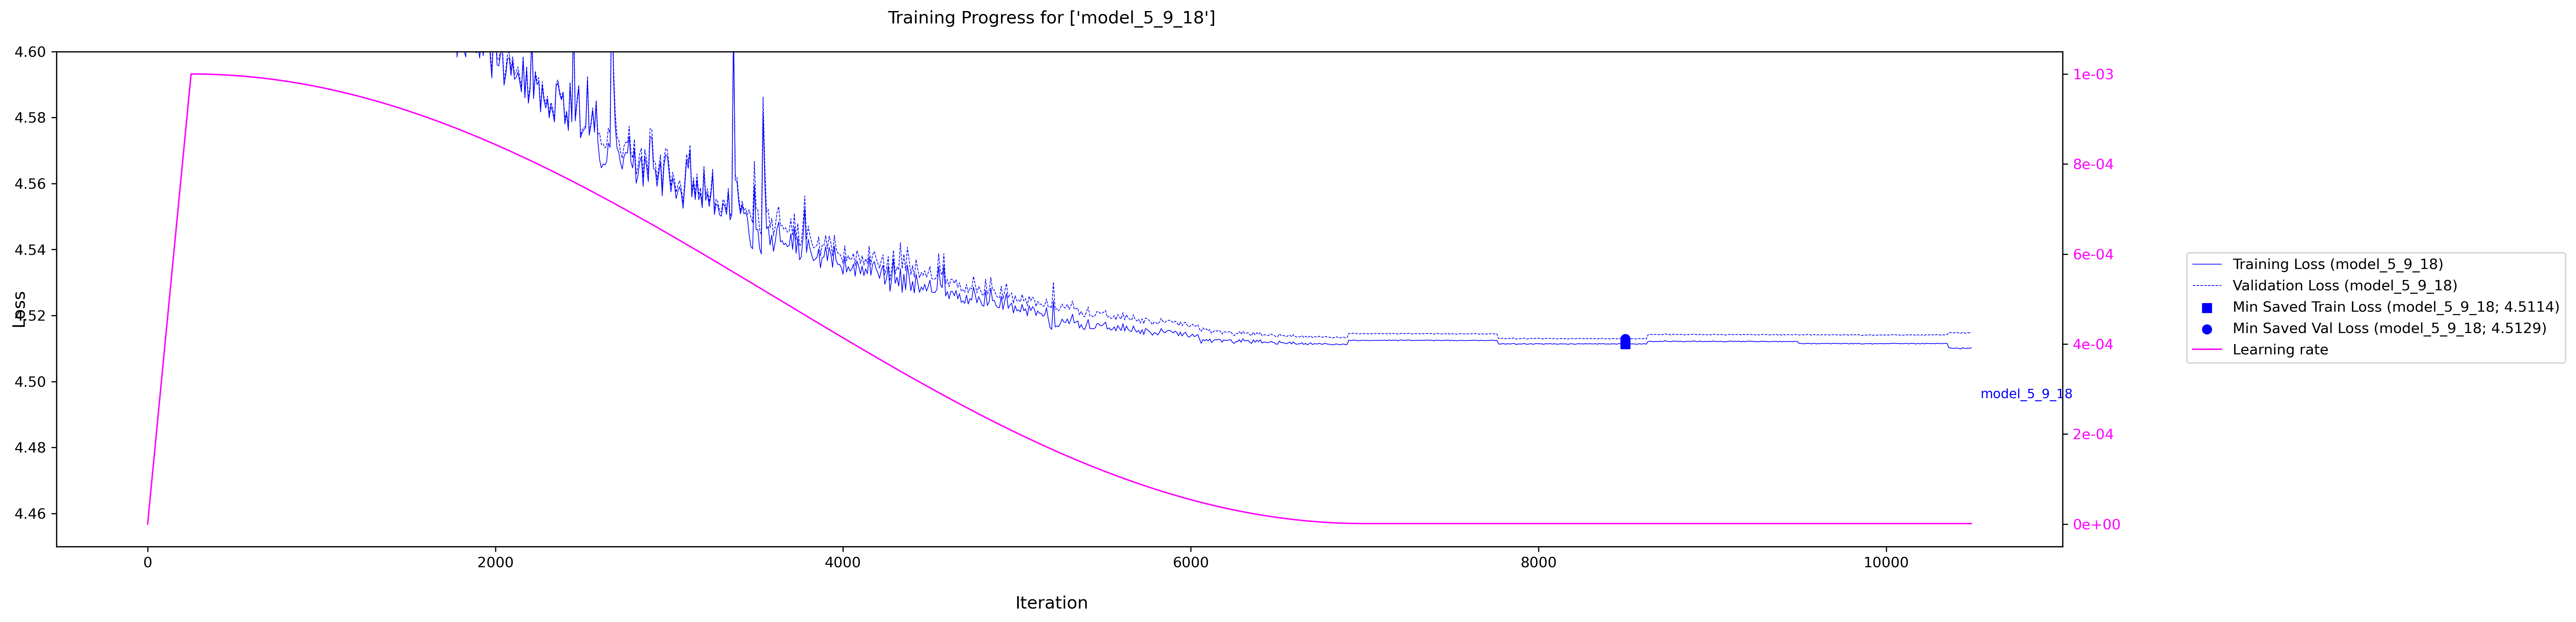

In [17]:
anal.plotting.plot_training_run(['model_5_9_18'], use_log=False, plot_lr_schedule=True)
anal.plotting.plot_training_run(['model_5_9_18'], use_log=False, y_lim=(4.45, 4.6), plot_lr_schedule=True)


(<Figure size 6300x1800 with 2 Axes>, <Axes: >)

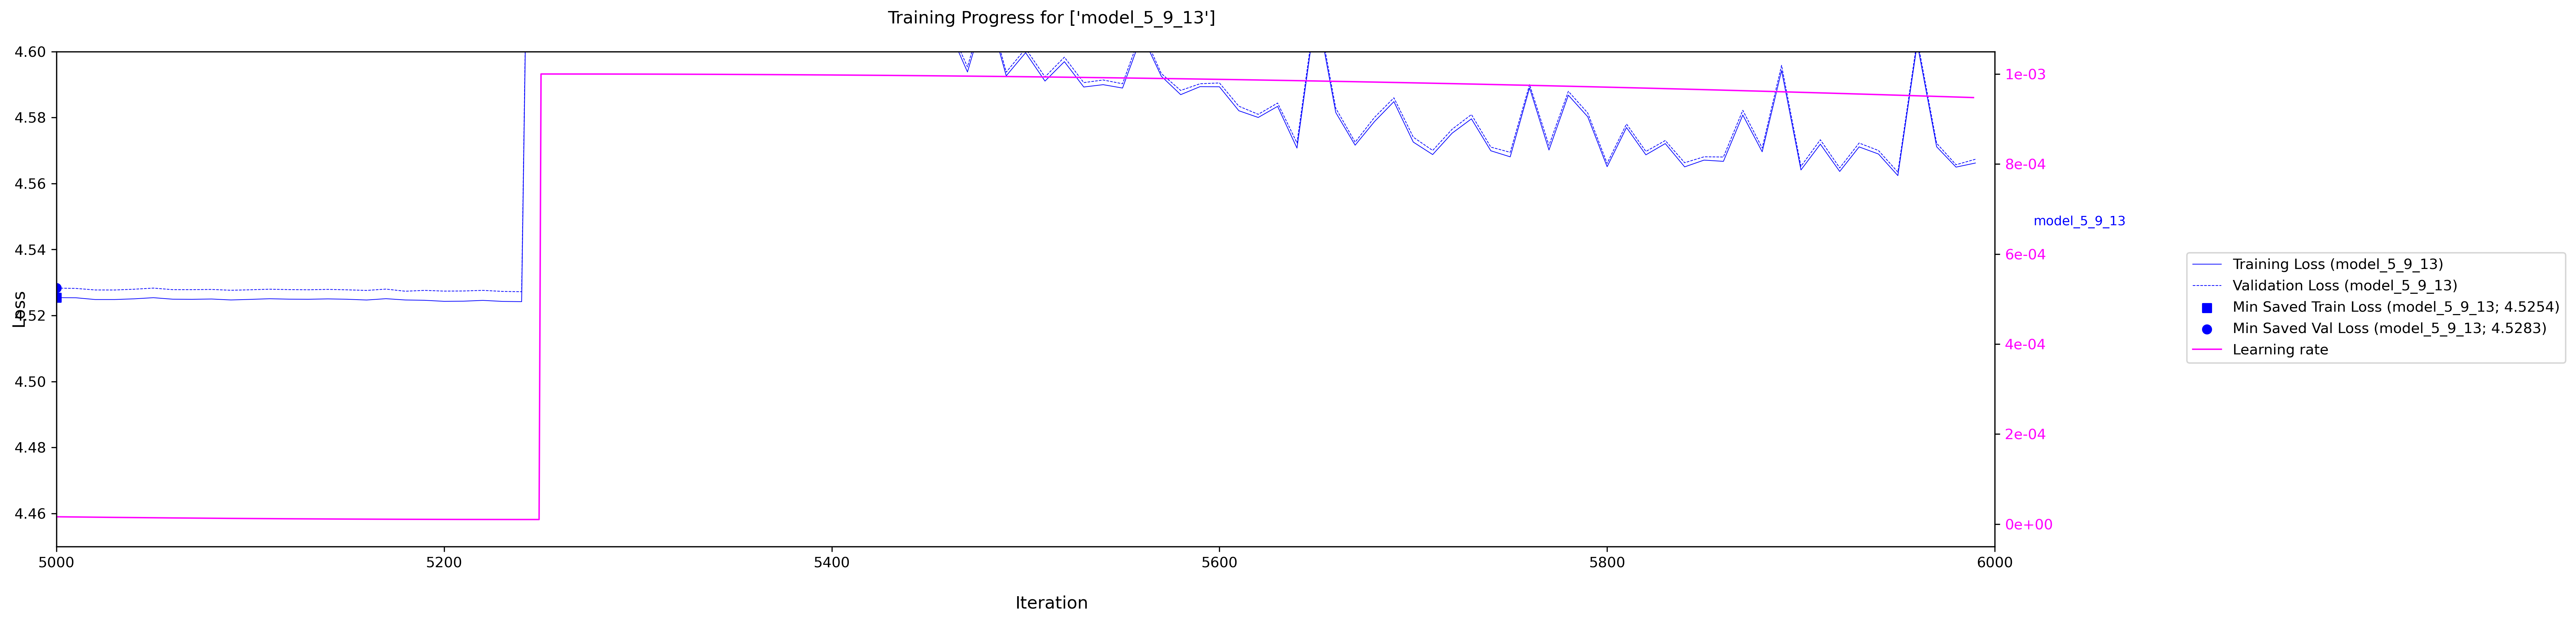

In [23]:
anal.plotting.plot_training_run(['model_5_9_13'], use_log=False, plot_lr_schedule=True)
anal.plotting.plot_training_run(['model_5_9_13'], use_log=False, y_lim=(4.45, 4.6), x_lim=(5000, 6000), plot_lr_schedule=True)
anal.plotting.plot_training_run(['model_5_9_13'], use_log=False, y_lim=(4.5, 5), x_lim=(5000, 7000), plot_lr_schedule=True)

(<Figure size 6300x1800 with 2 Axes>, <Axes: >)

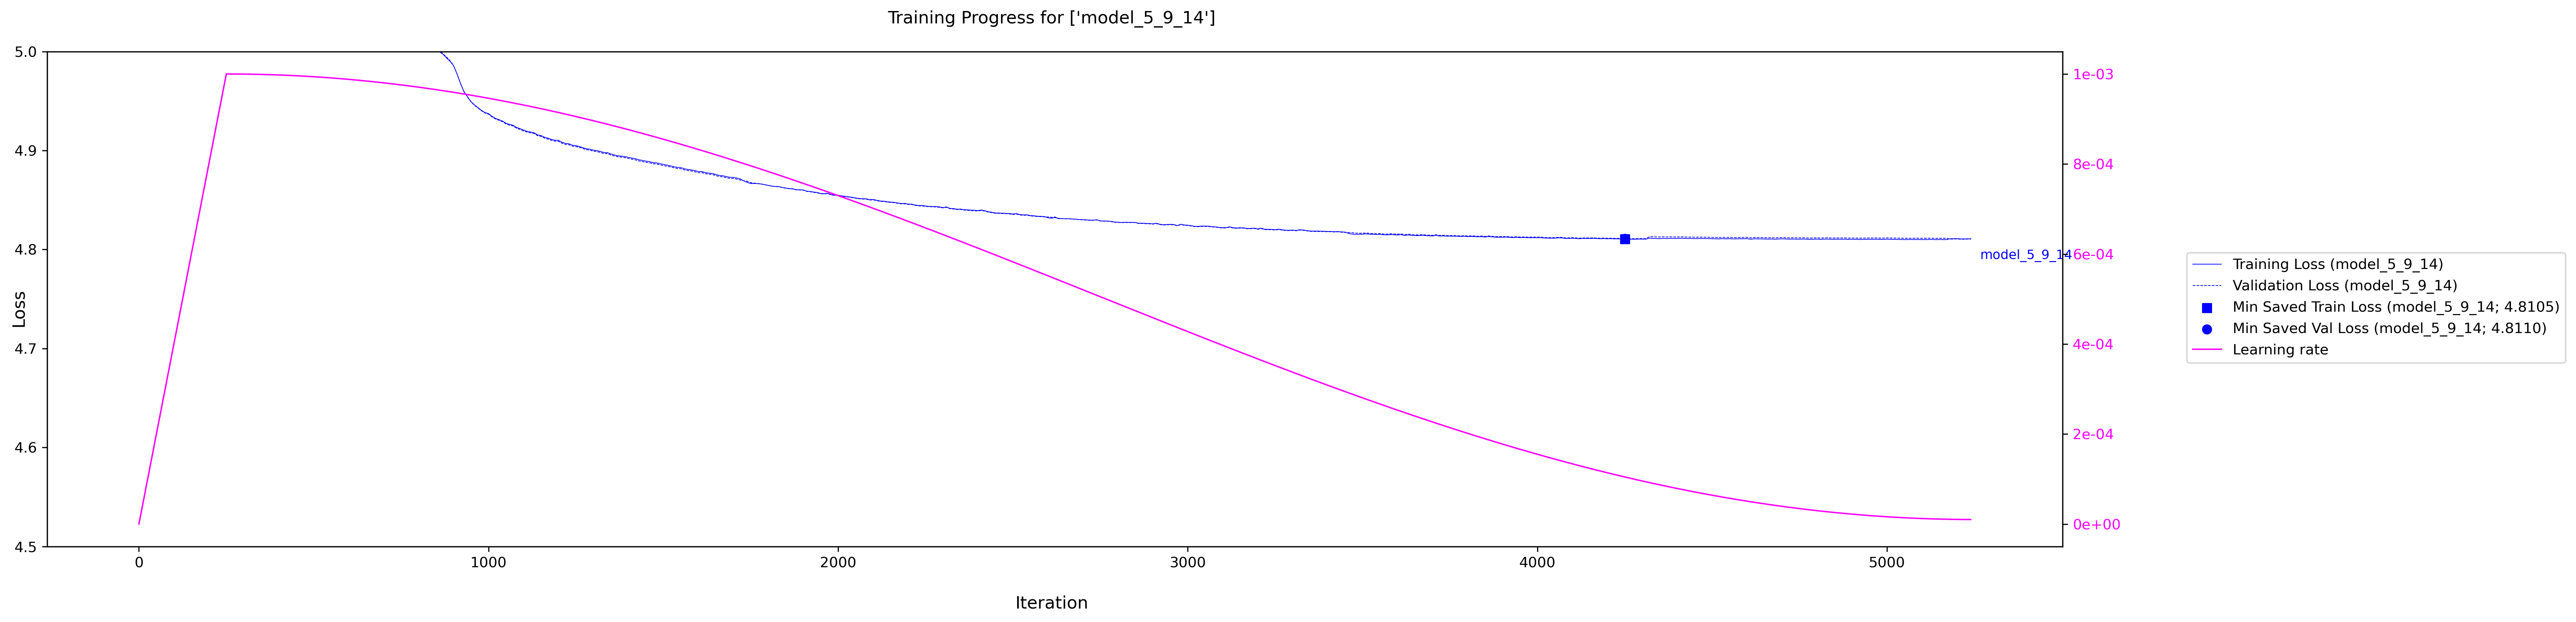

In [28]:
anal.plotting.plot_training_run(['model_5_9_14'], use_log=False, y_lim=(4.45, 4.6), x_lim=(3000, 6000), plot_lr_schedule=True)
anal.plotting.plot_training_run(['model_5_9_14'], use_log=False, y_lim=(4.5, 5), plot_lr_schedule=True)

In [12]:
df = anal.tables.get_default_df(['model_5_9_1', 'model_5_9_3'])
display(df[['model_name'] + anal.tables.model_metrics_columns])

model_name  coverage          mmd  kpd_median  fpd_value    w1m_score  w1p_avg_eta  w1p_avg_phi  w1p_avg_pt
0  model_5_9_1     0.559  8258.751032    0.012089   0.158485  3527.619508     0.090096     0.089276  266.599179
1  model_5_9_3     0.557  7942.271353    0.007812   0.092291  2955.909453     0.055732     0.050097  253.182189